In [1]:
from dotenv import load_dotenv
from pathlib import Path

# Load the environment variables file
load_dotenv(dotenv_path=Path().parent / ".env")

True

In [2]:
import os

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")
ROBOFLOW_MODEL_ID = os.getenv("ROBOFLOW_MODEL_ID")
ROBOFLOW_MODEL_VERSION = os.getenv("ROBOFLOW_MODEL_VERSION")
ROBOWFLOW_WORKSPACE = "north-of-60-labs-io4gr"
ROBOFLOW_PROJECT_ID = os.getenv("ROBOFLOW_PROJECT_ID")

In [3]:
print(ROBOFLOW_API_KEY)
print(ROBOFLOW_MODEL_ID)
print(ROBOFLOW_MODEL_VERSION)
print(ROBOWFLOW_WORKSPACE)
print(ROBOFLOW_PROJECT_ID)

5mvaZGpSPkdiqzPzUWr9
ish
3
north-of-60-labs-io4gr
ish


In [4]:
from roboflow import Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOWFLOW_WORKSPACE).project(ROBOFLOW_PROJECT_ID)
dataset = project.version(ROBOFLOW_MODEL_VERSION).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ish-3 in yolov8:: 100%|██████████| 592/592 [00:00<00:00, 5201.29it/s]


In [5]:
from ultralytics import YOLO
model = YOLO('yolov8n-pose.pt')


data = Path() / "Ish-3" / "data.yaml"

results = model.train(data=data, epochs=50, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.155 🚀 Python-3.11.9 torch-2.7.1 CPU (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Ish-3/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overla

train: Scanning /Users/scmitton/dev/ishboxing/ml/Ish-3/train/labels... 203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 203/203 [00:00<00:00, 2061.38it/s]

train: New cache created: /Users/scmitton/dev/ishboxing/ml/Ish-3/train/labels.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 192.0±52.8 MB/s, size: 25.8 KB)



val: Scanning /Users/scmitton/dev/ishboxing/ml/Ish-3/valid/labels... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 2141.08it/s]

val: New cache created: /Users/scmitton/dev/ishboxing/ml/Ish-3/valid/labels.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.165      6.339     0.7764      3.197      2.301         20        640: 100%|██████████| 13/13 [01:27<00:00,  6.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.85s/it]

                   all         58         58      0.888      0.983      0.984      0.625          0          0          0          0

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       2/50         0G      1.205      4.759     0.7015      1.088      1.336         17        640: 100%|██████████| 13/13 [01:26<00:00,  6.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.88s/it]

                   all         58         58          1      0.959      0.993      0.677   0.000504     0.0172   0.000324   3.24e-05

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       3/50         0G      1.104      4.532     0.7115     0.8026      1.212         22        640: 100%|██████████| 13/13 [01:26<00:00,  6.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.78s/it]

                   all         58         58      0.889      0.897      0.864      0.428      0.273      0.276     0.0835     0.0125

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       4/50         0G      1.114      4.489     0.6771      0.799      1.163         20        640: 100%|██████████| 13/13 [01:23<00:00,  6.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         58         58      0.942      0.931      0.977      0.617      0.451      0.397      0.204     0.0228

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       5/50         0G      1.028      4.104     0.6846     0.6812       1.11         19        640: 100%|██████████| 13/13 [01:25<00:00,  6.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.88s/it]

                   all         58         58      0.933          1      0.991      0.622      0.832      0.793      0.736      0.112

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       6/50         0G      1.033      3.837     0.6656     0.6871      1.123         18        640: 100%|██████████| 13/13 [01:25<00:00,  6.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.75s/it]

                   all         58         58      0.996      0.914      0.958      0.727      0.656      0.603      0.449     0.0574

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       7/50         0G     0.9929      3.666     0.6543     0.6663      1.095         30        640: 100%|██████████| 13/13 [01:22<00:00,  6.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.83s/it]

                   all         58         58      0.966      0.982      0.986      0.719      0.901      0.879      0.902      0.187

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       8/50         0G     0.9748      3.494     0.6244     0.6381      1.094         17        640: 100%|██████████| 13/13 [01:22<00:00,  6.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         58         58      0.851      0.983      0.979      0.692      0.808      0.798      0.775       0.11

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



       9/50         0G      0.962      3.441     0.6127     0.6466      1.079         15        640: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.84s/it]

                   all         58         58      0.685      0.828      0.831      0.519      0.503      0.741      0.605      0.112

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      10/50         0G     0.9684      3.206     0.5972     0.6514      1.068         21        640: 100%|██████████| 13/13 [01:25<00:00,  6.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.93s/it]

                   all         58         58      0.981          1      0.995        0.8      0.823      0.879      0.847      0.174

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      11/50         0G     0.8762      3.217     0.5646     0.5786       1.04         15        640: 100%|██████████| 13/13 [01:22<00:00,  6.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.85s/it]

                   all         58         58      0.981          1      0.995      0.776      0.851      0.897      0.901      0.175

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      12/50         0G     0.8831      3.035     0.5626     0.5937      1.042         18        640: 100%|██████████| 13/13 [01:24<00:00,  6.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]

                   all         58         58      0.998          1      0.995      0.774      0.922      0.914      0.928      0.234

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      13/50         0G      0.888      3.024     0.5484     0.5625      1.044         31        640: 100%|██████████| 13/13 [01:23<00:00,  6.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         58         58      0.966       0.98       0.99      0.767      0.951      0.862      0.918      0.209

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      14/50         0G     0.9325      2.995     0.5522     0.6059      1.088         19        640: 100%|██████████| 13/13 [01:23<00:00,  6.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         58         58      0.997          1      0.995      0.812      0.888      0.931       0.94      0.231

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      15/50         0G     0.9131      3.179     0.5418     0.6083      1.064         26        640: 100%|██████████| 13/13 [01:21<00:00,  6.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]

                   all         58         58      0.997          1      0.995      0.791      0.997          1      0.995      0.324

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      16/50         0G     0.9042      2.796     0.5069     0.5971      1.044         14        640: 100%|██████████| 13/13 [01:25<00:00,  6.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]

                   all         58         58      0.997          1      0.995      0.747      0.963      0.966      0.963      0.348



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.8913      2.885      0.543     0.5403      1.043         12        640: 100%|██████████| 13/13 [01:21<00:00,  6.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         58         58      0.977          1      0.994      0.802      0.977          1      0.994      0.321

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      18/50         0G     0.8618       2.67     0.5416     0.5457      1.016         22        640: 100%|██████████| 13/13 [01:22<00:00,  6.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]

                   all         58         58      0.999          1      0.995      0.793      0.964      0.966      0.956      0.306

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      19/50         0G      0.857      2.583     0.5406      0.535      1.029         18        640: 100%|██████████| 13/13 [01:23<00:00,  6.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.87s/it]

                   all         58         58      0.999          1      0.995      0.815      0.964      0.966      0.944      0.377

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      20/50         0G     0.8597      2.388     0.5021     0.5338      1.033         20        640: 100%|██████████| 13/13 [01:23<00:00,  6.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.79s/it]

                   all         58         58      0.997          1      0.995      0.774      0.945      0.948      0.934      0.391

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      21/50         0G     0.8612      2.183     0.5278     0.5506      1.023         26        640: 100%|██████████| 13/13 [01:24<00:00,  6.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.78s/it]

                   all         58         58      0.997          1      0.995      0.806      0.997          1      0.995      0.583

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      22/50         0G      0.819      2.077      0.512     0.5291      1.028         17        640: 100%|██████████| 13/13 [01:30<00:00,  6.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.12s/it]

                   all         58         58      0.999          1      0.995      0.809      0.999          1      0.995      0.686



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.7841      1.764      0.511     0.4941     0.9925         19        640: 100%|██████████| 13/13 [01:32<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.35s/it]

                   all         58         58          1      0.998      0.995      0.814          1      0.998      0.995      0.735

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      24/50         0G     0.7854      1.569     0.5133     0.4847      1.004         19        640: 100%|██████████| 13/13 [01:45<00:00,  8.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.18s/it]

                   all         58         58      0.999          1      0.995       0.83      0.999          1      0.995      0.829



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.8094      1.578     0.5651     0.5189      1.034         17        640: 100%|██████████| 13/13 [01:37<00:00,  7.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.42s/it]

                   all         58         58      0.997          1      0.995      0.782      0.997          1      0.995      0.864

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      26/50         0G     0.8009       1.44     0.5158     0.4887      1.009         17        640: 100%|██████████| 13/13 [01:22<00:00,  6.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.83s/it]

                   all         58         58      0.999          1      0.995      0.814      0.999          1      0.995      0.836

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      27/50         0G     0.8355      1.427     0.5044     0.5192       1.02         19        640: 100%|██████████| 13/13 [01:24<00:00,  6.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.74s/it]

                   all         58         58      0.999          1      0.995      0.823      0.964      0.966      0.963      0.871

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      28/50         0G     0.7532      1.285     0.4807     0.4528     0.9754         25        640: 100%|██████████| 13/13 [01:27<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]

                   all         58         58      0.999          1      0.995      0.804      0.999          1      0.995      0.942

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      29/50         0G     0.7325      1.246       0.49     0.4541      1.002         24        640: 100%|██████████| 13/13 [01:24<00:00,  6.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.29s/it]

                   all         58         58      0.999          1      0.995       0.81      0.999          1      0.995      0.956

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      30/50         0G     0.7837      1.254     0.5188     0.4777      1.004         26        640: 100%|██████████| 13/13 [01:31<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]

                   all         58         58      0.999          1      0.995      0.824      0.999          1      0.995      0.936

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      31/50         0G     0.7222      1.223     0.5211     0.4572     0.9772         27        640: 100%|██████████| 13/13 [01:28<00:00,  6.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.86s/it]

                   all         58         58       0.99          1      0.995      0.807       0.99          1      0.995      0.892

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      32/50         0G     0.7686      1.205     0.5211     0.4562     0.9893         20        640: 100%|██████████| 13/13 [01:39<00:00,  7.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.87s/it]

                   all         58         58      0.989          1      0.995      0.838      0.971      0.983      0.982      0.823

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      33/50         0G     0.7822      1.119     0.5167     0.4542     0.9902         17        640: 100%|██████████| 13/13 [01:21<00:00,  6.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.67s/it]

                   all         58         58      0.999          1      0.995      0.832      0.999          1      0.995      0.966

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      34/50         0G     0.7585      1.291     0.5221     0.4493     0.9807         21        640: 100%|██████████| 13/13 [01:24<00:00,  6.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.85s/it]

                   all         58         58      0.999          1      0.995      0.846      0.999          1      0.995      0.976

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      35/50         0G     0.7447     0.9943      0.491     0.4362     0.9745         25        640: 100%|██████████| 13/13 [01:22<00:00,  6.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.78s/it]

                   all         58         58      0.999          1      0.995      0.841      0.999          1      0.995      0.967

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      36/50         0G     0.7561     0.9591     0.5157     0.4358     0.9789         25        640: 100%|██████████| 13/13 [01:22<00:00,  6.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.86s/it]

                   all         58         58      0.999          1      0.995       0.84      0.999          1      0.995      0.965

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      37/50         0G     0.7189     0.9484     0.4964     0.4236     0.9751         21        640: 100%|██████████| 13/13 [01:27<00:00,  6.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         58         58      0.999          1      0.995       0.83      0.999          1      0.995      0.959

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      38/50         0G      0.742      1.039     0.5255     0.4329     0.9924         21        640: 100%|██████████| 13/13 [01:26<00:00,  6.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]

                   all         58         58      0.999          1      0.995      0.847      0.999          1      0.995      0.968

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      39/50         0G     0.7148      0.856     0.4861     0.4137     0.9619         13        640: 100%|██████████| 13/13 [01:22<00:00,  6.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]

                   all         58         58      0.999          1      0.995       0.85      0.999          1      0.995      0.972

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      40/50         0G     0.6975     0.7895     0.4977     0.4145     0.9732         21        640: 100%|██████████| 13/13 [01:20<00:00,  6.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]

                   all         58         58      0.999          1      0.995      0.856      0.999          1      0.995      0.959
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      41/50         0G     0.6419     0.4309      0.199     0.3391     0.9217         11        640: 100%|██████████| 13/13 [01:22<00:00,  6.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.72s/it]

                   all         58         58      0.999          1      0.995      0.859      0.999          1      0.995      0.964

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      42/50         0G     0.6577     0.3355     0.1822     0.3342     0.9238         11        640: 100%|██████████| 13/13 [01:22<00:00,  6.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         58         58      0.999          1      0.995      0.843      0.999          1      0.995      0.967

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      43/50         0G     0.6094      0.324     0.1987     0.3291     0.9101         11        640: 100%|██████████| 13/13 [01:21<00:00,  6.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.86s/it]

                   all         58         58      0.999          1      0.995      0.835      0.999          1      0.995      0.978

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      44/50         0G     0.6129     0.2726     0.1653      0.322     0.9235         11        640: 100%|██████████| 13/13 [01:22<00:00,  6.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         58         58      0.999          1      0.995      0.843      0.999          1      0.995      0.975

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      45/50         0G     0.6256     0.3081     0.1648      0.324     0.9139         11        640: 100%|██████████| 13/13 [01:19<00:00,  6.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]

                   all         58         58      0.999          1      0.995      0.856      0.999          1      0.995       0.98

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      46/50         0G     0.6081     0.2908     0.1666     0.3208     0.8932         11        640: 100%|██████████| 13/13 [01:23<00:00,  6.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         58         58      0.999          1      0.995      0.859      0.999          1      0.995      0.983



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.5873     0.2743     0.1515     0.3107     0.9044         11        640: 100%|██████████| 13/13 [01:25<00:00,  6.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.02s/it]

                   all         58         58      0.999          1      0.995       0.86      0.999          1      0.995      0.985

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      48/50         0G     0.5926     0.2724     0.1596     0.3069     0.9086         11        640: 100%|██████████| 13/13 [01:21<00:00,  6.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.78s/it]

                   all         58         58      0.999          1      0.995      0.863      0.999          1      0.995      0.985

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      49/50         0G      0.579     0.2702     0.1248     0.3041     0.9116         11        640: 100%|██████████| 13/13 [01:21<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.71s/it]

                   all         58         58      0.999          1      0.995      0.863      0.999          1      0.995      0.987

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



      50/50         0G     0.5761      0.279     0.1475     0.2973     0.8892         11        640: 100%|██████████| 13/13 [01:21<00:00,  6.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.76s/it]

                   all         58         58      0.999          1      0.995      0.867      0.999          1      0.995      0.987

50 epochs completed in 1.320 hours.


Optimizer stripped from runs/pose/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.4MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.9 torch-2.7.1 CPU (Apple M1 Pro)
YOLOv8n-pose summary (fused): 81 layers, 3,088,301 parameters, 0 gradients, 8.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.63s/it]


                   all         58         58      0.999          1      0.995      0.867      0.999          1      0.995      0.987
Speed: 1.6ms preprocess, 154.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/pose/train


In [7]:
from ultralytics import YOLO

model = YOLO('runs/pose/train/weights/best.pt')

In [9]:
model("resized_image.jpeg")


image 1/1 /Users/scmitton/dev/ishboxing/ml/resized_image.jpeg: 640x640 1 face, 115.9ms
Speed: 6.1ms preprocess, 115.9ms inference, 14.6ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'face'}
 obb: None
 orig_img: array([[[ 16,  20,   9],
         [ 23,  27,  16],
         [ 71,  74,  65],
         ...,
         [ 84, 118, 117],
         [ 86, 120, 119],
         [ 84, 118, 117]],
 
        [[ 57,  61,  50],
         [ 68,  72,  61],
         [ 73,  76,  67],
         ...,
         [ 79, 113, 112],
         [ 86, 120, 119],
         [ 83, 117, 116]],
 
        [[ 73,  76,  67],
         [ 77,  80,  71],
         [ 73,  78,  69],
         ...,
         [ 85, 119, 118],
         [ 82, 116, 115],
         [ 81, 115, 114]],
 
        ...,
 
        [[148, 168, 169],
         [123, 143, 144],
         [133, 154, 156],
         ...,
         [190, 208, 201],
         [189, 207, 200],
         [190, 209, 200]],
 
        [[134, 154, 155],
         [137, 157, 158],
         [142, 163, 1

In [30]:
model.export(format="coreml")

Ultralytics 8.3.155 🚀 Python-3.11.9 torch-2.7.1 CPU (Apple M1 Pro)

PyTorch: starting from 'runs/pose/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 23, 8400) (6.1 MB)

CoreML: starting export with coremltools 8.3.0...


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 135.69 passes/s]


CoreML: export success ✅ 4.4s, saved as 'runs/pose/train/weights/best.mlpackage' (6.1 MB)

Export complete (4.7s)
Results saved to /Users/scmitton/dev/ishboxing/ml/runs/pose/train/weights
Predict:         yolo predict task=pose model=runs/pose/train/weights/best.mlpackage imgsz=640  
Validate:        yolo val task=pose model=runs/pose/train/weights/best.mlpackage imgsz=640 data=Ish-3/data.yaml  
Visualize:       https://netron.app


'runs/pose/train/weights/best.mlpackage'

In [28]:
%matplotlib inline


image 1/1 /Users/scmitton/dev/ishboxing/ml/resized_image.jpeg: 640x640 1 face, 97.0ms
Speed: 2.3ms preprocess, 97.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
keypoints shape:  torch.Size([1, 6, 3]) keypoints:  tensor([[[264.4134, 327.4522,   0.9218],
         [408.4624, 321.9947,   0.9443],
         [344.9872, 289.8193,   0.9560],
         [349.1686, 439.7687,   0.9444],
         [287.5623, 453.8735,   0.9269],
         [399.3673, 439.1888,   0.9170]]])


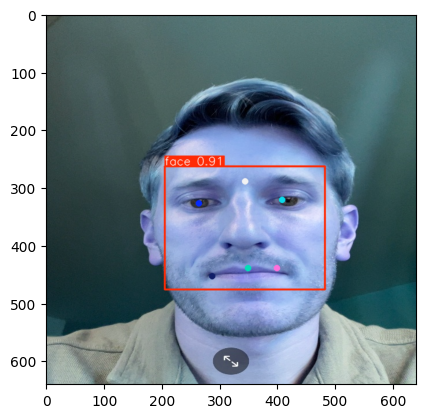

In [29]:

import matplotlib.pyplot as plt
import cv2

image_path = "Ish-3/train/images/right-0010_png.rf.3b2495ae67bb0ae654c6c452d239ebae.jpg"
other_image = 'image.jpeg'

# Read and resize other_image to match image_path dimensions
target_img = cv2.imread(image_path)
target_size = target_img.shape[:2]

img = cv2.imread(other_image)
img = cv2.resize(img, (target_size[1], target_size[0]))
cv2.imwrite('resized_' + other_image, img)

results = model('resized_' + other_image)

print('keypoints shape: ', results[0].keypoints.data.shape, "keypoints: ", results[0].keypoints.data)

plt.imshow(results[0].plot())
plt.show()